In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("D:/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [43]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [44]:
data = data.drop("customerID",axis='columns')

In [45]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [47]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')

In [48]:
data.shape

(7043, 20)

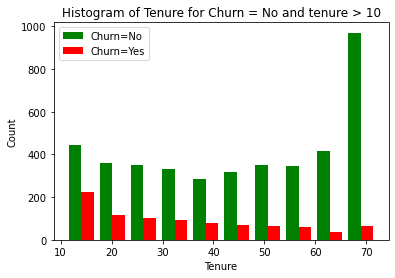

In [49]:
churn_no_tenure_gt_10 = data[(data['Churn'] == 'No') & (data['tenure'] > 10)]
churn_yes_tenure_gt_10 = data[(data['Churn'] == 'Yes') & (data['tenure'] > 10)]
plt.hist([churn_no_tenure_gt_10['tenure'],churn_yes_tenure_gt_10['tenure']], color=["green","red"],bins=10)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(["Churn=No","Churn=Yes"])
plt.title('Histogram of Tenure for Churn = No and tenure > 10')
plt.show()


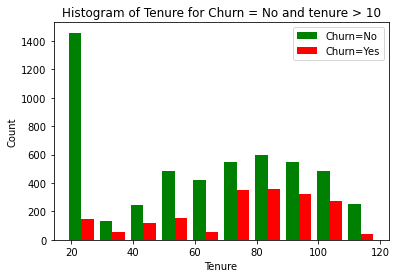

In [50]:
churn_no_tenure_gt_10 = data[(data['Churn'] == 'No')].MonthlyCharges
churn_yes_tenure_gt_10 = data[(data['Churn'] == 'Yes')].MonthlyCharges
plt.hist([churn_no_tenure_gt_10,churn_yes_tenure_gt_10], color=["green","red"],bins=10)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(["Churn=No","Churn=Yes"])
plt.title('Histogram of Tenure for Churn = No and tenure > 10')
plt.show()


In [51]:
for columns in data:
    if data[columns].dtype == 'object':
        print(f"{columns} :\n {data[columns].unique()}\n")

gender :
 ['Female' 'Male']

Partner :
 ['Yes' 'No']

Dependents :
 ['No' 'Yes']

PhoneService :
 ['No' 'Yes']

MultipleLines :
 ['No phone service' 'No' 'Yes']

InternetService :
 ['DSL' 'Fiber optic' 'No']

OnlineSecurity :
 ['No' 'Yes' 'No internet service']

OnlineBackup :
 ['Yes' 'No' 'No internet service']

DeviceProtection :
 ['No' 'Yes' 'No internet service']

TechSupport :
 ['No' 'Yes' 'No internet service']

StreamingTV :
 ['No' 'Yes' 'No internet service']

StreamingMovies :
 ['No' 'Yes' 'No internet service']

Contract :
 ['Month-to-month' 'One year' 'Two year']

PaperlessBilling :
 ['Yes' 'No']

PaymentMethod :
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn :
 ['No' 'Yes']



In [52]:
data = data.replace(["No phone service","No internet service"], "No")

In [53]:
for columns in data:
    if data[columns].dtype == 'object':
        print(f"{columns} :\n {data[columns].unique()}\n")

gender :
 ['Female' 'Male']

Partner :
 ['Yes' 'No']

Dependents :
 ['No' 'Yes']

PhoneService :
 ['No' 'Yes']

MultipleLines :
 ['No' 'Yes']

InternetService :
 ['DSL' 'Fiber optic' 'No']

OnlineSecurity :
 ['No' 'Yes']

OnlineBackup :
 ['Yes' 'No']

DeviceProtection :
 ['No' 'Yes']

TechSupport :
 ['No' 'Yes']

StreamingTV :
 ['No' 'Yes']

StreamingMovies :
 ['No' 'Yes']

Contract :
 ['Month-to-month' 'One year' 'Two year']

PaperlessBilling :
 ['Yes' 'No']

PaymentMethod :
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn :
 ['No' 'Yes']



In [54]:
list_of_yes_no = []

for column in data:
    if data[column].dtype == 'object':
        print(f"{column}:\n{data[column].value_counts()}\n")
        if data[column].value_counts().index.size == 2:
            list_of_yes_no.append(column)


gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines:
No     4072
Yes    2971
Name: MultipleLines, dtype: int64

InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity:
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

OnlineBackup:
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

DeviceProtection:
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

TechSupport:
No     4999
Yes    2044
Name: TechSupport, dtype: int64

StreamingTV:
No     4336
Yes    2707
Name: StreamingTV, dtype: int64

StreamingMovies:
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

Contract:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dty

In [55]:
list_of_yes_no.remove("gender")

In [56]:
for col in list_of_yes_no:
    data[col].replace({"Yes":1, "No":0},inplace=True)

In [57]:
data['gender'].replace({"Male":1, "Female":0},inplace=True)

In [58]:
ohe_InternetService = pd.get_dummies(data["InternetService"])

In [59]:
ohe_Contract = pd.get_dummies(data["Contract"])

In [60]:
ohe_PaymentMethod = pd.get_dummies(data["PaymentMethod"])

In [61]:
data = data.drop(["InternetService","Contract","PaymentMethod"],axis="columns")

In [62]:
data = pd.concat([data,ohe_InternetService,ohe_Contract,ohe_PaymentMethod],axis=1)

In [63]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [64]:
class_distribution = data['Churn'].value_counts()
class_distribution

0    5174
1    1869
Name: Churn, dtype: int64

<BarContainer object of 2 artists>

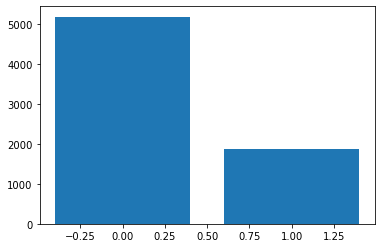

In [65]:
plt.bar(class_distribution.index,class_distribution.values)

C:\Users\SABAREESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

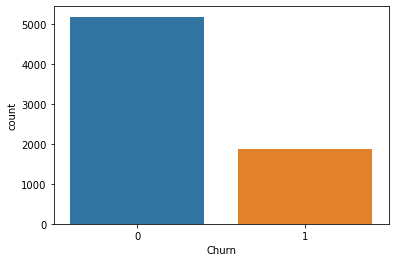

In [68]:
import seaborn as sns
sns.countplot(data.Churn)

In [69]:
class_percentages = class_distribution / len(data) * 100
print(class_percentages)


0    73.463013
1    26.536987
Name: Churn, dtype: float64


In [70]:
!pip install imbalanced-learn


In [71]:
from imblearn.under_sampling import RandomUnderSampler

In [98]:
X = data.drop('Churn', axis=1)
y = data['Churn']

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [99]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [100]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [101]:
X_undersampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,1,0,0,0,72,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,1,1,0,1,7,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,48,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,13,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3734,0,0,0,0,9,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3735,1,1,0,0,1,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3736,0,0,0,0,67,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [102]:
y_undersampled

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int64

In [103]:
bal_data = pd.concat([X_undersampled,y_undersampled],axis=1)

In [104]:
bal_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Churn
0,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,1,0,0,0,72,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,1,1,0,1,7,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,0,48,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,0,13,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3734,0,0,0,0,9,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3735,1,1,0,0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
3736,0,0,0,0,67,1,1,1,1,1,...,1,0,1,0,0,0,1,0,0,1


C:\Users\SABAREESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

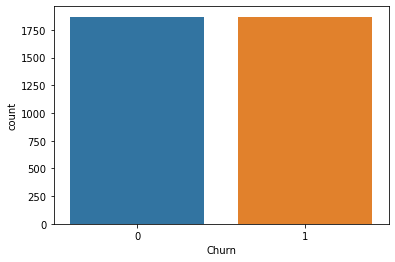

In [105]:
sns.countplot(bal_data["Churn"])

In [106]:
missing_indices = X[X["TotalCharges"].isnull()].index
X.drop(missing_indices, inplace=True)
y.drop(missing_indices, inplace=True)

In [107]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [108]:
bal_data_2 = pd.concat([X_oversampled, y_oversampled],axis=1)

In [109]:
bal_data_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'DSL',
       'Fiber optic', 'No', 'Month-to-month', 'One year', 'Two year',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'Churn'],
      dtype='object')

C:\Users\SABAREESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

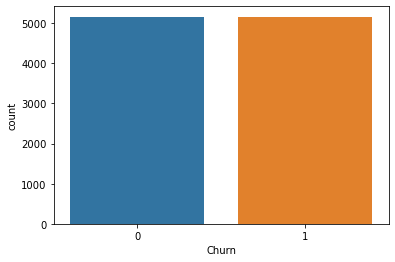

In [110]:
sns.countplot(bal_data_2["Churn"])

In [111]:
scale = ["tenure","MonthlyCharges","TotalCharges"]

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bal_data[scale] = scaler.fit_transform(bal_data[scale])
bal_data_2[scale] = scaler.fit_transform(bal_data_2[scale])

# ANN MODEL

In [113]:
x = bal_data.drop("Churn",axis=1)
y = bal_data["Churn"]

In [114]:
x2 = bal_data_2.drop("Churn",axis=1)
y2 = bal_data_2["Churn"]

In [115]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,random_state=42)

In [116]:
y_train

485     0
2170    1
3291    1
1097    0
258     0
       ..
1130    0
1294    0
860     0
3507    1
3174    1
Name: Churn, Length: 2990, dtype: int64

In [117]:
import tensorflow as tf
from tensorflow import keras

In [118]:
len(x_train.columns)

26

In [119]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
94/94 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.4916
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 9/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 10/50
94/94 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4983
Epoch 11/50
94/94 [==============================

In [129]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

model2 = keras.Sequential([
    Dense(26, input_shape=(26,), activation="relu"),
    Dropout(0.2),
    Dense(15, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid"),
])

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model2.fit(x_train2, y_train2, epochs=50)


Epoch 1/50
242/242 [==============================] - 1s 1ms/step - loss: 0.5901 - accuracy: 0.6747
Epoch 2/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7958
Epoch 3/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.8013
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8152
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8181
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8237
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8304
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8253
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8342
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8304

In [121]:
model.evaluate(x_test,y_test)

24/24 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5067


[nan, 0.5066844820976257]

In [131]:
model2.evaluate(x_test,y_test)

24/24 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7567


[nan, 0.7566844820976257]

In [160]:
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(26,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train2, y_train2, epochs=50, validation_data=(x_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: %.2f%%' % (accuracy * 100))


Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 0.6344 - accuracy: 0.6369 - val_loss: nan - val_accuracy: 0.7487
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 0.5171 - accuracy: 0.7607 - val_loss: nan - val_accuracy: 0.7447
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.7862 - val_loss: nan - val_accuracy: 0.7500
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.7962 - val_loss: nan - val_accuracy: 0.7580
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8013 - val_loss: nan - val_accuracy: 0.7540
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8059 - val_loss: nan - val_accuracy: 0.7473
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8131 - val_loss: nan - val_accuracy: 0.7393
Epoch 8/50
242/242 [=======